In [2]:
# Importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer, LabelEncoder

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV, train_test_split


# 일반적으로 회귀에는 기본 k-겹 교차검증을 사용하고, 분류에는 StratifiedKFold를 사용한다.

# 또한, cross_val_score 함수에는 KFold의 매개변수를 제어할 수가 없으므로, 

# 따로 KFold 객체를 만들고 매개변수를 조정한 다음에 cross_val_score의 cv 매개변수에 넣어야 한다.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, make_scorer, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

import warnings         # warnings : 버전 충돌 및 특정 예외 처리를 위해 불러온 내장 모듈
warnings.filterwarnings("ignore", category=RuntimeWarning)

# 1. EDA

In [3]:
train = pd.read_csv("./train.csv",encoding='latin-1')
print('dataset shape:', train.shape)
train.head()

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [5]:
# 극 불균형 상태임을 확인

print(train['TARGET'].value_counts())

unsatisfied_cnt = train[train['TARGET'] == 1]['TARGET'].count()
total_cnt = train['TARGET'].count()

print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [6]:
# 모두 수치형 변수

train.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


# 2. 데이터 전처리

In [7]:
print(train['var3'].value_counts( )[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [8]:
# var3 피처 값 대체 및 ID 피처 드롭
train['var3'].replace(-999999, 2, inplace=True)
train.drop('ID', axis=1, inplace=True)

# 3. 모델링

In [9]:
y = train['TARGET']
y.shape

(76020,)

In [10]:
X = train.drop(['TARGET'], axis=1)
X.shape

(76020, 369)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


# 4. 샘플링기법 미적용

### 4-1. XGBoost 모델 학습과 하이퍼파라미터튜닝

In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85830	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88237	validation_1-auc:0.84101
[17]	validation_0-auc:0.88352	validation_1-auc:0.84071
[18]	validation_0-au

[149]	validation_0-auc:0.94612	validation_1-auc:0.82400
[150]	validation_0-auc:0.94656	validation_1-auc:0.82373
[151]	validation_0-auc:0.94730	validation_1-auc:0.82376
[152]	validation_0-auc:0.94818	validation_1-auc:0.82360
[153]	validation_0-auc:0.94844	validation_1-auc:0.82383
[154]	validation_0-auc:0.94923	validation_1-auc:0.82359
[155]	validation_0-auc:0.94927	validation_1-auc:0.82358
[156]	validation_0-auc:0.94957	validation_1-auc:0.82354
[157]	validation_0-auc:0.94965	validation_1-auc:0.82359
[158]	validation_0-auc:0.94977	validation_1-auc:0.82343
[159]	validation_0-auc:0.94978	validation_1-auc:0.82337
[160]	validation_0-auc:0.94993	validation_1-auc:0.82301
[161]	validation_0-auc:0.94994	validation_1-auc:0.82285
[162]	validation_0-auc:0.95019	validation_1-auc:0.82249
[163]	validation_0-auc:0.95029	validation_1-auc:0.82273
[164]	validation_0-auc:0.95036	validation_1-auc:0.82285
[165]	validation_0-auc:0.95038	validation_1-auc:0.82287
[166]	validation_0-auc:0.95038	validation_1-auc:

[296]	validation_0-auc:0.97026	validation_1-auc:0.80945
[297]	validation_0-auc:0.97049	validation_1-auc:0.80950
[298]	validation_0-auc:0.97051	validation_1-auc:0.80947
[299]	validation_0-auc:0.97058	validation_1-auc:0.80937
[300]	validation_0-auc:0.97060	validation_1-auc:0.80915
[301]	validation_0-auc:0.97091	validation_1-auc:0.80896
[302]	validation_0-auc:0.97117	validation_1-auc:0.80892
[303]	validation_0-auc:0.97148	validation_1-auc:0.80865
[304]	validation_0-auc:0.97148	validation_1-auc:0.80877
[305]	validation_0-auc:0.97154	validation_1-auc:0.80869
[306]	validation_0-auc:0.97162	validation_1-auc:0.80861
[307]	validation_0-auc:0.97177	validation_1-auc:0.80844
[308]	validation_0-auc:0.97194	validation_1-auc:0.80836
[309]	validation_0-auc:0.97200	validation_1-auc:0.80838
[310]	validation_0-auc:0.97200	validation_1-auc:0.80837
[311]	validation_0-auc:0.97207	validation_1-auc:0.80835
[312]	validation_0-auc:0.97215	validation_1-auc:0.80852
[313]	validation_0-auc:0.97230	validation_1-auc:

[443]	validation_0-auc:0.97896	validation_1-auc:0.80328
[444]	validation_0-auc:0.97897	validation_1-auc:0.80331
[445]	validation_0-auc:0.97901	validation_1-auc:0.80345
[446]	validation_0-auc:0.97906	validation_1-auc:0.80347
[447]	validation_0-auc:0.97916	validation_1-auc:0.80333
[448]	validation_0-auc:0.97921	validation_1-auc:0.80330
[449]	validation_0-auc:0.97921	validation_1-auc:0.80332
[450]	validation_0-auc:0.97931	validation_1-auc:0.80332
[451]	validation_0-auc:0.97932	validation_1-auc:0.80337
[452]	validation_0-auc:0.97962	validation_1-auc:0.80329
[453]	validation_0-auc:0.97966	validation_1-auc:0.80363
[454]	validation_0-auc:0.97967	validation_1-auc:0.80360
[455]	validation_0-auc:0.97969	validation_1-auc:0.80344
[456]	validation_0-auc:0.97975	validation_1-auc:0.80330
[457]	validation_0-auc:0.97995	validation_1-auc:0.80304
[458]	validation_0-auc:0.97997	validation_1-auc:0.80290
[459]	validation_0-auc:0.98002	validation_1-auc:0.80255
[460]	validation_0-auc:0.98011	validation_1-auc:

### GridSearchCV

In [18]:
from sklearn.model_selection import GridSearchCV

# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함.

xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.02, max_depth=5,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 

xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.81750	validation_1-auc:0.81176
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.82040	validation_1-auc:0.81291
[2]	validation_0-auc:0.82300	validation_1-auc:0.81592
[3]	validation_0-auc:0.82349	validation_1-auc:0.81580
[4]	validation_0-auc:0.82477	validation_1-auc:0.81596
[5]	validation_0-auc:0.82568	validation_1-auc:0.81607
[6]	validation_0-auc:0.82605	validation_1-auc:0.81705
[7]	validation_0-auc:0.82622	validation_1-auc:0.81714
[8]	validation_0-auc:0.82614	validation_1-auc:0.81657
[9]	validation_0-auc:0.82997	validation_1-auc:0.82089
[10]	validation_0-auc:0.83156	validation_1-auc:0.82171
[11]	validation_0-auc:0.82966	validation_1-auc:0.82074
[12]	validation_0-auc:0.83046	validation_1-auc:0.82225
[13]	validation_0-auc:0.83089	validation_1-auc:0.82262
[14]	validation_0-auc:0.83411	validation_1-auc:0.82715
[15]	validation_0-auc:0.834

[146]	validation_0-auc:0.85686	validation_1-auc:0.84188
[147]	validation_0-auc:0.85703	validation_1-auc:0.84198
[148]	validation_0-auc:0.85719	validation_1-auc:0.84215
[149]	validation_0-auc:0.85734	validation_1-auc:0.84247
[150]	validation_0-auc:0.85749	validation_1-auc:0.84250
[151]	validation_0-auc:0.85759	validation_1-auc:0.84257
[152]	validation_0-auc:0.85771	validation_1-auc:0.84269
[153]	validation_0-auc:0.85777	validation_1-auc:0.84282
[154]	validation_0-auc:0.85789	validation_1-auc:0.84282
[155]	validation_0-auc:0.85799	validation_1-auc:0.84280
[156]	validation_0-auc:0.85816	validation_1-auc:0.84293
[157]	validation_0-auc:0.85820	validation_1-auc:0.84289
[158]	validation_0-auc:0.85840	validation_1-auc:0.84287
[159]	validation_0-auc:0.85840	validation_1-auc:0.84282
[160]	validation_0-auc:0.85860	validation_1-auc:0.84275
[161]	validation_0-auc:0.85900	validation_1-auc:0.84297
[162]	validation_0-auc:0.85912	validation_1-auc:0.84291
[163]	validation_0-auc:0.85939	validation_1-auc:

[293]	validation_0-auc:0.87355	validation_1-auc:0.84346
[294]	validation_0-auc:0.87361	validation_1-auc:0.84347
[295]	validation_0-auc:0.87369	validation_1-auc:0.84350
[296]	validation_0-auc:0.87377	validation_1-auc:0.84349
[297]	validation_0-auc:0.87382	validation_1-auc:0.84355
[298]	validation_0-auc:0.87388	validation_1-auc:0.84361
[299]	validation_0-auc:0.87396	validation_1-auc:0.84361
[300]	validation_0-auc:0.87404	validation_1-auc:0.84354
[301]	validation_0-auc:0.87417	validation_1-auc:0.84365
[302]	validation_0-auc:0.87429	validation_1-auc:0.84364
[303]	validation_0-auc:0.87439	validation_1-auc:0.84365
[304]	validation_0-auc:0.87446	validation_1-auc:0.84366
[305]	validation_0-auc:0.87456	validation_1-auc:0.84368
[306]	validation_0-auc:0.87466	validation_1-auc:0.84365
[307]	validation_0-auc:0.87476	validation_1-auc:0.84362
[308]	validation_0-auc:0.87482	validation_1-auc:0.84361
[309]	validation_0-auc:0.87495	validation_1-auc:0.84365
[310]	validation_0-auc:0.87502	validation_1-auc:

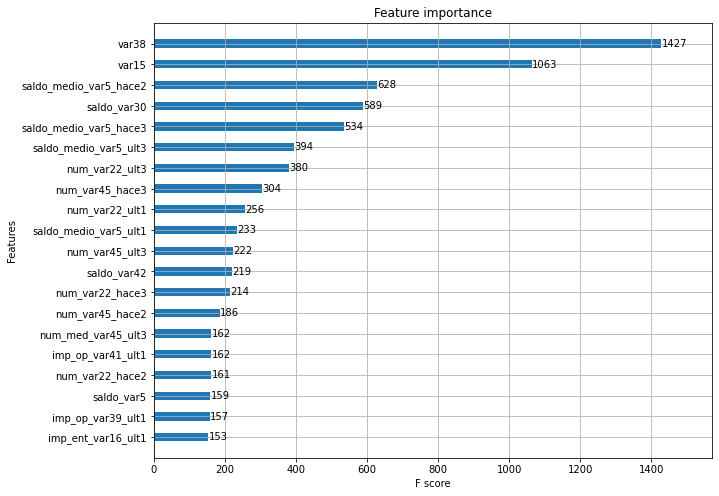

In [19]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20, height=0.4)

### 4-2. LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [21]:
# Light GBM

import sklearn.metrics as metrics

lgbm_clf = LGBMClassifier(n_estimators=400, n_jobs = -1)
lgbm_clf.fit(X_train, y_train)
lgbm_clf_pred = lgbm_clf.predict(X_test)

lgbm_clf_cv_pre = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
lgbm_clf_cv_rec = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
lgbm_clf_cv_f1 = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for Light GBM is ', metrics.precision_score(lgbm_clf_pred, y_test))
print('Recall for Light GBM is ', metrics.recall_score(lgbm_clf_pred, y_test))
print('F1_score for Light GBM is ', metrics.f1_score(lgbm_clf_pred, y_test))
print()
print('The cross validated precision for Light GBM is:', lgbm_clf_cv_pre.mean())
print('The cross validated recall for Light GBM is:', lgbm_clf_cv_rec.mean())
print('The cross validated f1_score for Light GBM is:', lgbm_clf_cv_f1.mean())

Precision for Light GBM is  0.00946372239747634
Recall for Light GBM is  0.2727272727272727
F1_score for Light GBM is  0.01829268292682927

The cross validated precision for Light GBM is: 0.3520866633366633
The cross validated recall for Light GBM is: 0.014319398645534161
The cross validated f1_score for Light GBM is: 0.0273718899859108


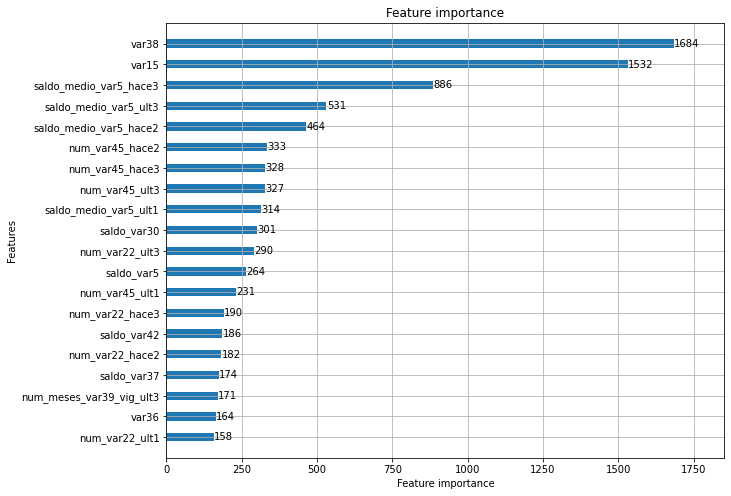

In [23]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(lgbm_clf, ax=ax , max_num_features=20, height=0.4)

### GridSearchCV

In [24]:
from sklearn.model_selection import GridSearchCV

LGBM_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827305	valid_1's binary_logloss: 0.156391
[4]	valid_0's auc: 0.837507	valid_0's binary_logloss: 0.144132	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.15332
[5]	valid_0's auc: 0.842275	valid_0's binary_logloss: 0.141652	valid_1's auc: 0.836036	valid_1's binary_logloss: 0.150954
[6]	valid_0's auc: 0.844971	valid_0's binary_logloss: 0.139662	valid_1's auc: 0.838026	valid_1's binary_logloss: 0.149041
[7]	valid_0's auc: 0.846612	valid_0's binary_logloss: 0.138002	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.147504
[8]	valid_0's auc: 0.848539	valid_0's binary_logloss: 0.136579	valid_1's auc: 0.839506	va

[27]	valid_0's auc: 0.872747	valid_0's binary_logloss: 0.124766	valid_1's auc: 0.83744	valid_1's binary_logloss: 0.139873
[28]	valid_0's auc: 0.873243	valid_0's binary_logloss: 0.124448	valid_1's auc: 0.837467	valid_1's binary_logloss: 0.139828
[29]	valid_0's auc: 0.873959	valid_0's binary_logloss: 0.124164	valid_1's auc: 0.83751	valid_1's binary_logloss: 0.139781
[30]	valid_0's auc: 0.874666	valid_0's binary_logloss: 0.123934	valid_1's auc: 0.837891	valid_1's binary_logloss: 0.139667
[31]	valid_0's auc: 0.875615	valid_0's binary_logloss: 0.123703	valid_1's auc: 0.83861	valid_1's binary_logloss: 0.139545
[32]	valid_0's auc: 0.876151	valid_0's binary_logloss: 0.123475	valid_1's auc: 0.838762	valid_1's binary_logloss: 0.13945
[33]	valid_0's auc: 0.877026	valid_0's binary_logloss: 0.123248	valid_1's auc: 0.838799	valid_1's binary_logloss: 0.139439
[34]	valid_0's auc: 0.877606	valid_0's binary_logloss: 0.123057	valid_1's auc: 0.838511	valid_1's binary_logloss: 0.139447
[35]	valid_0's auc: 

[35]	valid_0's auc: 0.876685	valid_0's binary_logloss: 0.123227	valid_1's auc: 0.837767	valid_1's binary_logloss: 0.139632
[36]	valid_0's auc: 0.877273	valid_0's binary_logloss: 0.122984	valid_1's auc: 0.837941	valid_1's binary_logloss: 0.139635
[37]	valid_0's auc: 0.877868	valid_0's binary_logloss: 0.12276	valid_1's auc: 0.83805	valid_1's binary_logloss: 0.139578
[38]	valid_0's auc: 0.878325	valid_0's binary_logloss: 0.122494	valid_1's auc: 0.83832	valid_1's binary_logloss: 0.139527
[39]	valid_0's auc: 0.878917	valid_0's binary_logloss: 0.122248	valid_1's auc: 0.838503	valid_1's binary_logloss: 0.139516
[40]	valid_0's auc: 0.879406	valid_0's binary_logloss: 0.122038	valid_1's auc: 0.838825	valid_1's binary_logloss: 0.139475
[41]	valid_0's auc: 0.87982	valid_0's binary_logloss: 0.121865	valid_1's auc: 0.838607	valid_1's binary_logloss: 0.139525
[42]	valid_0's auc: 0.880217	valid_0's binary_logloss: 0.121697	valid_1's auc: 0.838459	valid_1's binary_logloss: 0.139582
[43]	valid_0's auc: 

[16]	valid_0's auc: 0.861293	valid_0's binary_logloss: 0.129652	valid_1's auc: 0.837155	valid_1's binary_logloss: 0.141436
[17]	valid_0's auc: 0.862801	valid_0's binary_logloss: 0.129	valid_1's auc: 0.836554	valid_1's binary_logloss: 0.141233
[18]	valid_0's auc: 0.864095	valid_0's binary_logloss: 0.128456	valid_1's auc: 0.836466	valid_1's binary_logloss: 0.140968
[19]	valid_0's auc: 0.864873	valid_0's binary_logloss: 0.127987	valid_1's auc: 0.837462	valid_1's binary_logloss: 0.140684
[20]	valid_0's auc: 0.866514	valid_0's binary_logloss: 0.127475	valid_1's auc: 0.837791	valid_1's binary_logloss: 0.140492
[21]	valid_0's auc: 0.867526	valid_0's binary_logloss: 0.127019	valid_1's auc: 0.837515	valid_1's binary_logloss: 0.140352
[22]	valid_0's auc: 0.868522	valid_0's binary_logloss: 0.126586	valid_1's auc: 0.837105	valid_1's binary_logloss: 0.14027
[23]	valid_0's auc: 0.869624	valid_0's binary_logloss: 0.126176	valid_1's auc: 0.837722	valid_1's binary_logloss: 0.140097
[24]	valid_0's auc: 

[15]	valid_0's auc: 0.859828	valid_0's binary_logloss: 0.130403	valid_1's auc: 0.837333	valid_1's binary_logloss: 0.142128
[16]	valid_0's auc: 0.861034	valid_0's binary_logloss: 0.129848	valid_1's auc: 0.836715	valid_1's binary_logloss: 0.141806
[17]	valid_0's auc: 0.861775	valid_0's binary_logloss: 0.129299	valid_1's auc: 0.837193	valid_1's binary_logloss: 0.141398
[18]	valid_0's auc: 0.862844	valid_0's binary_logloss: 0.128797	valid_1's auc: 0.837688	valid_1's binary_logloss: 0.141105
[19]	valid_0's auc: 0.864183	valid_0's binary_logloss: 0.128254	valid_1's auc: 0.838493	valid_1's binary_logloss: 0.1408
[20]	valid_0's auc: 0.865434	valid_0's binary_logloss: 0.127764	valid_1's auc: 0.83826	valid_1's binary_logloss: 0.140629
[21]	valid_0's auc: 0.866549	valid_0's binary_logloss: 0.127313	valid_1's auc: 0.83802	valid_1's binary_logloss: 0.140491
[22]	valid_0's auc: 0.867557	valid_0's binary_logloss: 0.126892	valid_1's auc: 0.838476	valid_1's binary_logloss: 0.140253
[23]	valid_0's auc: 

[30]	valid_0's auc: 0.889591	valid_0's binary_logloss: 0.118672	valid_1's auc: 0.828616	valid_1's binary_logloss: 0.141616
[31]	valid_0's auc: 0.889981	valid_0's binary_logloss: 0.118339	valid_1's auc: 0.828525	valid_1's binary_logloss: 0.141555
[32]	valid_0's auc: 0.891237	valid_0's binary_logloss: 0.117949	valid_1's auc: 0.828309	valid_1's binary_logloss: 0.141603
[33]	valid_0's auc: 0.891831	valid_0's binary_logloss: 0.117655	valid_1's auc: 0.827914	valid_1's binary_logloss: 0.141685
[34]	valid_0's auc: 0.892391	valid_0's binary_logloss: 0.117339	valid_1's auc: 0.827348	valid_1's binary_logloss: 0.141814
[35]	valid_0's auc: 0.893036	valid_0's binary_logloss: 0.116984	valid_1's auc: 0.827162	valid_1's binary_logloss: 0.141867
[36]	valid_0's auc: 0.893952	valid_0's binary_logloss: 0.116643	valid_1's auc: 0.82722	valid_1's binary_logloss: 0.141919
[37]	valid_0's auc: 0.894628	valid_0's binary_logloss: 0.116343	valid_1's auc: 0.827088	valid_1's binary_logloss: 0.141964
[38]	valid_0's au

[12]	valid_0's auc: 0.867975	valid_0's binary_logloss: 0.129168	valid_1's auc: 0.836728	valid_1's binary_logloss: 0.143155
[13]	valid_0's auc: 0.870558	valid_0's binary_logloss: 0.128157	valid_1's auc: 0.836515	valid_1's binary_logloss: 0.142684
[14]	valid_0's auc: 0.872242	valid_0's binary_logloss: 0.127255	valid_1's auc: 0.836322	valid_1's binary_logloss: 0.142312
[15]	valid_0's auc: 0.873758	valid_0's binary_logloss: 0.126426	valid_1's auc: 0.836377	valid_1's binary_logloss: 0.14194
[16]	valid_0's auc: 0.875262	valid_0's binary_logloss: 0.125659	valid_1's auc: 0.835719	valid_1's binary_logloss: 0.141765
[17]	valid_0's auc: 0.876886	valid_0's binary_logloss: 0.124929	valid_1's auc: 0.835566	valid_1's binary_logloss: 0.141548
[18]	valid_0's auc: 0.878549	valid_0's binary_logloss: 0.124244	valid_1's auc: 0.835682	valid_1's binary_logloss: 0.141281
[19]	valid_0's auc: 0.880422	valid_0's binary_logloss: 0.12357	valid_1's auc: 0.835543	valid_1's binary_logloss: 0.141181
[20]	valid_0's auc

[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165036
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841411	valid_0's binary_logloss: 0.14989	valid_1's auc: 0.821568	valid_1's binary_logloss: 0.159541
[3]	valid_0's auc: 0.849517	valid_0's binary_logloss: 0.14572	valid_1's auc: 0.82788	valid_1's binary_logloss: 0.155987
[4]	valid_0's auc: 0.853918	valid_0's binary_logloss: 0.142455	valid_1's auc: 0.830738	valid_1's binary_logloss: 0.153089
[5]	valid_0's auc: 0.857301	valid_0's binary_logloss: 0.139735	valid_1's auc: 0.834385	valid_1's binary_logloss: 0.150632
[6]	valid_0's auc: 0.860317	valid_0's binary_logloss: 0.137505	valid_1's auc: 0.834978	valid_1's binary_logloss: 0.148792
[7]	valid_0's auc: 0.862342	valid_0's binary_logloss: 0.135605	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.147286
[8]	valid_0's auc: 0.863801	valid_0's binary_logloss: 0.133938	valid_1's auc: 0.836233	va

[24]	valid_0's auc: 0.88598	valid_0's binary_logloss: 0.120748	valid_1's auc: 0.83552	valid_1's binary_logloss: 0.140629
[25]	valid_0's auc: 0.887201	valid_0's binary_logloss: 0.120274	valid_1's auc: 0.835925	valid_1's binary_logloss: 0.14052
[26]	valid_0's auc: 0.888423	valid_0's binary_logloss: 0.119775	valid_1's auc: 0.835694	valid_1's binary_logloss: 0.140493
[27]	valid_0's auc: 0.889313	valid_0's binary_logloss: 0.119337	valid_1's auc: 0.835559	valid_1's binary_logloss: 0.140489
[28]	valid_0's auc: 0.890034	valid_0's binary_logloss: 0.118884	valid_1's auc: 0.835284	valid_1's binary_logloss: 0.14046
[29]	valid_0's auc: 0.890803	valid_0's binary_logloss: 0.11848	valid_1's auc: 0.835875	valid_1's binary_logloss: 0.14033
[30]	valid_0's auc: 0.891689	valid_0's binary_logloss: 0.118067	valid_1's auc: 0.835628	valid_1's binary_logloss: 0.140375
[31]	valid_0's auc: 0.892688	valid_0's binary_logloss: 0.117678	valid_1's auc: 0.835223	valid_1's binary_logloss: 0.140399
[32]	valid_0's auc: 0.

[14]	valid_0's auc: 0.857996	valid_0's binary_logloss: 0.131389	valid_1's auc: 0.839052	valid_1's binary_logloss: 0.141727
[15]	valid_0's auc: 0.859511	valid_0's binary_logloss: 0.130739	valid_1's auc: 0.839062	valid_1's binary_logloss: 0.141355
[16]	valid_0's auc: 0.860457	valid_0's binary_logloss: 0.130175	valid_1's auc: 0.838898	valid_1's binary_logloss: 0.141072
[17]	valid_0's auc: 0.861101	valid_0's binary_logloss: 0.129656	valid_1's auc: 0.838785	valid_1's binary_logloss: 0.140731
[18]	valid_0's auc: 0.862022	valid_0's binary_logloss: 0.12915	valid_1's auc: 0.839358	valid_1's binary_logloss: 0.140433
[19]	valid_0's auc: 0.863252	valid_0's binary_logloss: 0.128659	valid_1's auc: 0.839999	valid_1's binary_logloss: 0.140181
[20]	valid_0's auc: 0.863823	valid_0's binary_logloss: 0.128254	valid_1's auc: 0.840096	valid_1's binary_logloss: 0.139974
[21]	valid_0's auc: 0.864524	valid_0's binary_logloss: 0.127855	valid_1's auc: 0.840183	valid_1's binary_logloss: 0.139827
[22]	valid_0's au

[47]	valid_0's auc: 0.881391	valid_0's binary_logloss: 0.121548	valid_1's auc: 0.837146	valid_1's binary_logloss: 0.139699
[48]	valid_0's auc: 0.881926	valid_0's binary_logloss: 0.121346	valid_1's auc: 0.837387	valid_1's binary_logloss: 0.139641
[49]	valid_0's auc: 0.882497	valid_0's binary_logloss: 0.121183	valid_1's auc: 0.837464	valid_1's binary_logloss: 0.13965
[50]	valid_0's auc: 0.882962	valid_0's binary_logloss: 0.121013	valid_1's auc: 0.837347	valid_1's binary_logloss: 0.139684
[51]	valid_0's auc: 0.883328	valid_0's binary_logloss: 0.120868	valid_1's auc: 0.837533	valid_1's binary_logloss: 0.139662
[52]	valid_0's auc: 0.883845	valid_0's binary_logloss: 0.12066	valid_1's auc: 0.838071	valid_1's binary_logloss: 0.139589
[53]	valid_0's auc: 0.884228	valid_0's binary_logloss: 0.120503	valid_1's auc: 0.837994	valid_1's binary_logloss: 0.139593
[54]	valid_0's auc: 0.884403	valid_0's binary_logloss: 0.120376	valid_1's auc: 0.837897	valid_1's binary_logloss: 0.139642
[55]	valid_0's auc

[32]	valid_0's auc: 0.871929	valid_0's binary_logloss: 0.124941	valid_1's auc: 0.833536	valid_1's binary_logloss: 0.14009
[33]	valid_0's auc: 0.872798	valid_0's binary_logloss: 0.124718	valid_1's auc: 0.833168	valid_1's binary_logloss: 0.140121
[34]	valid_0's auc: 0.873431	valid_0's binary_logloss: 0.12451	valid_1's auc: 0.833313	valid_1's binary_logloss: 0.140097
[35]	valid_0's auc: 0.873806	valid_0's binary_logloss: 0.124316	valid_1's auc: 0.833176	valid_1's binary_logloss: 0.140105
[36]	valid_0's auc: 0.874204	valid_0's binary_logloss: 0.124118	valid_1's auc: 0.833063	valid_1's binary_logloss: 0.140129
[37]	valid_0's auc: 0.874899	valid_0's binary_logloss: 0.1239	valid_1's auc: 0.83378	valid_1's binary_logloss: 0.140005
[38]	valid_0's auc: 0.875362	valid_0's binary_logloss: 0.123685	valid_1's auc: 0.833865	valid_1's binary_logloss: 0.140011
[39]	valid_0's auc: 0.875966	valid_0's binary_logloss: 0.123474	valid_1's auc: 0.833771	valid_1's binary_logloss: 0.139979
[40]	valid_0's auc: 0

[18]	valid_0's auc: 0.861152	valid_0's binary_logloss: 0.129486	valid_1's auc: 0.837531	valid_1's binary_logloss: 0.141159
[19]	valid_0's auc: 0.862227	valid_0's binary_logloss: 0.129003	valid_1's auc: 0.837295	valid_1's binary_logloss: 0.140963
[20]	valid_0's auc: 0.863276	valid_0's binary_logloss: 0.12855	valid_1's auc: 0.837772	valid_1's binary_logloss: 0.140751
[21]	valid_0's auc: 0.864197	valid_0's binary_logloss: 0.128139	valid_1's auc: 0.837784	valid_1's binary_logloss: 0.140652
[22]	valid_0's auc: 0.865145	valid_0's binary_logloss: 0.12775	valid_1's auc: 0.837974	valid_1's binary_logloss: 0.140483
[23]	valid_0's auc: 0.865962	valid_0's binary_logloss: 0.127368	valid_1's auc: 0.837557	valid_1's binary_logloss: 0.140367
[24]	valid_0's auc: 0.866988	valid_0's binary_logloss: 0.127008	valid_1's auc: 0.837021	valid_1's binary_logloss: 0.140316
[25]	valid_0's auc: 0.868263	valid_0's binary_logloss: 0.12663	valid_1's auc: 0.837265	valid_1's binary_logloss: 0.140197
[26]	valid_0's auc:

[84]	valid_0's auc: 0.890869	valid_0's binary_logloss: 0.116619	valid_1's auc: 0.837565	valid_1's binary_logloss: 0.140263
[85]	valid_0's auc: 0.891174	valid_0's binary_logloss: 0.116509	valid_1's auc: 0.837241	valid_1's binary_logloss: 0.140345
[86]	valid_0's auc: 0.891255	valid_0's binary_logloss: 0.116424	valid_1's auc: 0.837141	valid_1's binary_logloss: 0.140382
Early stopping, best iteration is:
[56]	valid_0's auc: 0.885034	valid_0's binary_logloss: 0.120016	valid_1's auc: 0.838201	valid_1's binary_logloss: 0.139564
[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164844
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841215	valid_0's binary_logloss: 0.150324	valid_1's auc: 0.823632	valid_1's binary_logloss: 0.159859
[3]	valid_0's auc: 0.846402	valid_0's binary_logloss: 0.146303	valid_1's auc: 0.824432	valid_1's binary_logloss: 0.156265
[4]	valid_0's auc: 0.851123	valid_0's binary_lo

[24]	valid_0's auc: 0.882456	valid_0's binary_logloss: 0.122317	valid_1's auc: 0.837621	valid_1's binary_logloss: 0.139557
[25]	valid_0's auc: 0.883646	valid_0's binary_logloss: 0.121815	valid_1's auc: 0.837461	valid_1's binary_logloss: 0.139517
[26]	valid_0's auc: 0.884752	valid_0's binary_logloss: 0.12134	valid_1's auc: 0.837924	valid_1's binary_logloss: 0.139402
[27]	valid_0's auc: 0.885706	valid_0's binary_logloss: 0.120926	valid_1's auc: 0.837521	valid_1's binary_logloss: 0.139415
[28]	valid_0's auc: 0.886476	valid_0's binary_logloss: 0.12049	valid_1's auc: 0.837391	valid_1's binary_logloss: 0.139392
[29]	valid_0's auc: 0.887401	valid_0's binary_logloss: 0.120092	valid_1's auc: 0.837142	valid_1's binary_logloss: 0.139389
[30]	valid_0's auc: 0.88847	valid_0's binary_logloss: 0.119653	valid_1's auc: 0.837007	valid_1's binary_logloss: 0.139427
[31]	valid_0's auc: 0.889406	valid_0's binary_logloss: 0.119235	valid_1's auc: 0.837386	valid_1's binary_logloss: 0.13934
[32]	valid_0's auc: 

[50]	valid_0's auc: 0.89913	valid_0's binary_logloss: 0.113872	valid_1's auc: 0.835727	valid_1's binary_logloss: 0.1405
[51]	valid_0's auc: 0.899546	valid_0's binary_logloss: 0.113635	valid_1's auc: 0.836189	valid_1's binary_logloss: 0.140435
[52]	valid_0's auc: 0.899796	valid_0's binary_logloss: 0.113446	valid_1's auc: 0.836528	valid_1's binary_logloss: 0.140412
[53]	valid_0's auc: 0.899848	valid_0's binary_logloss: 0.113287	valid_1's auc: 0.836191	valid_1's binary_logloss: 0.140511
[54]	valid_0's auc: 0.900303	valid_0's binary_logloss: 0.113006	valid_1's auc: 0.835867	valid_1's binary_logloss: 0.140619
[55]	valid_0's auc: 0.900788	valid_0's binary_logloss: 0.112738	valid_1's auc: 0.835597	valid_1's binary_logloss: 0.140716
[56]	valid_0's auc: 0.900867	valid_0's binary_logloss: 0.112563	valid_1's auc: 0.835775	valid_1's binary_logloss: 0.140731
[57]	valid_0's auc: 0.900882	valid_0's binary_logloss: 0.112423	valid_1's auc: 0.835795	valid_1's binary_logloss: 0.140747
[58]	valid_0's auc:

[14]	valid_0's auc: 0.870702	valid_0's binary_logloss: 0.128307	valid_1's auc: 0.838019	valid_1's binary_logloss: 0.141374
[15]	valid_0's auc: 0.871975	valid_0's binary_logloss: 0.127523	valid_1's auc: 0.83802	valid_1's binary_logloss: 0.140933
[16]	valid_0's auc: 0.873071	valid_0's binary_logloss: 0.126793	valid_1's auc: 0.838163	valid_1's binary_logloss: 0.140591
[17]	valid_0's auc: 0.874334	valid_0's binary_logloss: 0.126108	valid_1's auc: 0.837716	valid_1's binary_logloss: 0.140362
[18]	valid_0's auc: 0.875627	valid_0's binary_logloss: 0.125531	valid_1's auc: 0.836977	valid_1's binary_logloss: 0.140249
[19]	valid_0's auc: 0.876957	valid_0's binary_logloss: 0.124919	valid_1's auc: 0.837445	valid_1's binary_logloss: 0.140038
[20]	valid_0's auc: 0.877892	valid_0's binary_logloss: 0.124384	valid_1's auc: 0.837849	valid_1's binary_logloss: 0.139918
[21]	valid_0's auc: 0.878874	valid_0's binary_logloss: 0.12384	valid_1's auc: 0.837238	valid_1's binary_logloss: 0.139882
[22]	valid_0's auc

[42]	valid_0's auc: 0.895782	valid_0's binary_logloss: 0.115888	valid_1's auc: 0.835369	valid_1's binary_logloss: 0.14032
[43]	valid_0's auc: 0.895994	valid_0's binary_logloss: 0.115655	valid_1's auc: 0.835382	valid_1's binary_logloss: 0.140379
[44]	valid_0's auc: 0.896287	valid_0's binary_logloss: 0.115426	valid_1's auc: 0.835169	valid_1's binary_logloss: 0.140406
[45]	valid_0's auc: 0.896767	valid_0's binary_logloss: 0.115148	valid_1's auc: 0.835223	valid_1's binary_logloss: 0.140418
[46]	valid_0's auc: 0.897406	valid_0's binary_logloss: 0.114846	valid_1's auc: 0.835554	valid_1's binary_logloss: 0.140402
[47]	valid_0's auc: 0.897922	valid_0's binary_logloss: 0.114594	valid_1's auc: 0.835407	valid_1's binary_logloss: 0.140445
[48]	valid_0's auc: 0.898413	valid_0's binary_logloss: 0.114317	valid_1's auc: 0.835472	valid_1's binary_logloss: 0.140451
[49]	valid_0's auc: 0.89881	valid_0's binary_logloss: 0.114115	valid_1's auc: 0.835652	valid_1's binary_logloss: 0.14045
[50]	valid_0's auc:

[15]	valid_0's auc: 0.860107	valid_0's binary_logloss: 0.130265	valid_1's auc: 0.837227	valid_1's binary_logloss: 0.141784
[16]	valid_0's auc: 0.861293	valid_0's binary_logloss: 0.129652	valid_1's auc: 0.837155	valid_1's binary_logloss: 0.141436
[17]	valid_0's auc: 0.862801	valid_0's binary_logloss: 0.129	valid_1's auc: 0.836554	valid_1's binary_logloss: 0.141233
[18]	valid_0's auc: 0.864095	valid_0's binary_logloss: 0.128456	valid_1's auc: 0.836466	valid_1's binary_logloss: 0.140968
[19]	valid_0's auc: 0.864873	valid_0's binary_logloss: 0.127987	valid_1's auc: 0.837462	valid_1's binary_logloss: 0.140684
[20]	valid_0's auc: 0.866514	valid_0's binary_logloss: 0.127475	valid_1's auc: 0.837791	valid_1's binary_logloss: 0.140492
[21]	valid_0's auc: 0.867526	valid_0's binary_logloss: 0.127019	valid_1's auc: 0.837515	valid_1's binary_logloss: 0.140352
[22]	valid_0's auc: 0.868522	valid_0's binary_logloss: 0.126586	valid_1's auc: 0.837105	valid_1's binary_logloss: 0.14027
[23]	valid_0's auc: 

[9]	valid_0's auc: 0.849549	valid_0's binary_logloss: 0.135437	valid_1's auc: 0.837358	valid_1's binary_logloss: 0.145575
[10]	valid_0's auc: 0.850797	valid_0's binary_logloss: 0.134374	valid_1's auc: 0.83794	valid_1's binary_logloss: 0.144671
[11]	valid_0's auc: 0.85216	valid_0's binary_logloss: 0.133441	valid_1's auc: 0.83805	valid_1's binary_logloss: 0.143939
[12]	valid_0's auc: 0.854509	valid_0's binary_logloss: 0.132621	valid_1's auc: 0.838172	valid_1's binary_logloss: 0.143406
[13]	valid_0's auc: 0.856837	valid_0's binary_logloss: 0.131801	valid_1's auc: 0.838172	valid_1's binary_logloss: 0.142845
[14]	valid_0's auc: 0.858379	valid_0's binary_logloss: 0.131085	valid_1's auc: 0.838161	valid_1's binary_logloss: 0.142438
[15]	valid_0's auc: 0.859828	valid_0's binary_logloss: 0.130403	valid_1's auc: 0.837333	valid_1's binary_logloss: 0.142128
[16]	valid_0's auc: 0.861034	valid_0's binary_logloss: 0.129848	valid_1's auc: 0.836715	valid_1's binary_logloss: 0.141806
[17]	valid_0's auc: 

[29]	valid_0's auc: 0.872834	valid_0's binary_logloss: 0.124667	valid_1's auc: 0.833672	valid_1's binary_logloss: 0.140234
[30]	valid_0's auc: 0.873209	valid_0's binary_logloss: 0.124428	valid_1's auc: 0.833228	valid_1's binary_logloss: 0.140246
[31]	valid_0's auc: 0.873779	valid_0's binary_logloss: 0.124154	valid_1's auc: 0.833437	valid_1's binary_logloss: 0.140196
[32]	valid_0's auc: 0.875169	valid_0's binary_logloss: 0.123793	valid_1's auc: 0.833543	valid_1's binary_logloss: 0.140131
[33]	valid_0's auc: 0.875945	valid_0's binary_logloss: 0.123538	valid_1's auc: 0.833771	valid_1's binary_logloss: 0.140074
[34]	valid_0's auc: 0.876838	valid_0's binary_logloss: 0.123273	valid_1's auc: 0.834188	valid_1's binary_logloss: 0.140029
[35]	valid_0's auc: 0.877285	valid_0's binary_logloss: 0.123033	valid_1's auc: 0.833868	valid_1's binary_logloss: 0.140083
[36]	valid_0's auc: 0.877822	valid_0's binary_logloss: 0.122827	valid_1's auc: 0.833427	valid_1's binary_logloss: 0.140161
[37]	valid_0's a

[59]	valid_0's auc: 0.889806	valid_0's binary_logloss: 0.118197	valid_1's auc: 0.838289	valid_1's binary_logloss: 0.139725
[60]	valid_0's auc: 0.889976	valid_0's binary_logloss: 0.118088	valid_1's auc: 0.83829	valid_1's binary_logloss: 0.139761
[61]	valid_0's auc: 0.890299	valid_0's binary_logloss: 0.117943	valid_1's auc: 0.838077	valid_1's binary_logloss: 0.139821
[62]	valid_0's auc: 0.890524	valid_0's binary_logloss: 0.117814	valid_1's auc: 0.838161	valid_1's binary_logloss: 0.139809
[63]	valid_0's auc: 0.890741	valid_0's binary_logloss: 0.117695	valid_1's auc: 0.837883	valid_1's binary_logloss: 0.139891
[64]	valid_0's auc: 0.891078	valid_0's binary_logloss: 0.117563	valid_1's auc: 0.837654	valid_1's binary_logloss: 0.139952
[65]	valid_0's auc: 0.891298	valid_0's binary_logloss: 0.117396	valid_1's auc: 0.837908	valid_1's binary_logloss: 0.139936
[66]	valid_0's auc: 0.891444	valid_0's binary_logloss: 0.117294	valid_1's auc: 0.837798	valid_1's binary_logloss: 0.139968
[67]	valid_0's au

[54]	valid_0's auc: 0.885952	valid_0's binary_logloss: 0.119342	valid_1's auc: 0.837545	valid_1's binary_logloss: 0.13991
[55]	valid_0's auc: 0.886405	valid_0's binary_logloss: 0.119167	valid_1's auc: 0.837432	valid_1's binary_logloss: 0.139935
[56]	valid_0's auc: 0.886617	valid_0's binary_logloss: 0.119038	valid_1's auc: 0.83708	valid_1's binary_logloss: 0.14002
Early stopping, best iteration is:
[26]	valid_0's auc: 0.870373	valid_0's binary_logloss: 0.125571	valid_1's auc: 0.839138	valid_1's binary_logloss: 0.139698
[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155302	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164826
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842061	valid_0's binary_logloss: 0.149839	valid_1's auc: 0.825811	valid_1's binary_logloss: 0.159948
[3]	valid_0's auc: 0.849289	valid_0's binary_logloss: 0.14568	valid_1's auc: 0.828876	valid_1's binary_logloss: 0.156323
[4]	valid_0's auc: 0.85217	valid_0's binary_loglos

[23]	valid_0's auc: 0.885369	valid_0's binary_logloss: 0.120992	valid_1's auc: 0.835781	valid_1's binary_logloss: 0.140443
[24]	valid_0's auc: 0.886215	valid_0's binary_logloss: 0.120502	valid_1's auc: 0.835501	valid_1's binary_logloss: 0.140363
[25]	valid_0's auc: 0.887513	valid_0's binary_logloss: 0.119975	valid_1's auc: 0.835926	valid_1's binary_logloss: 0.140274
[26]	valid_0's auc: 0.888713	valid_0's binary_logloss: 0.119497	valid_1's auc: 0.835254	valid_1's binary_logloss: 0.140329
[27]	valid_0's auc: 0.889795	valid_0's binary_logloss: 0.11904	valid_1's auc: 0.835371	valid_1's binary_logloss: 0.140341
[28]	valid_0's auc: 0.8904	valid_0's binary_logloss: 0.118653	valid_1's auc: 0.834904	valid_1's binary_logloss: 0.140409
[29]	valid_0's auc: 0.891515	valid_0's binary_logloss: 0.118177	valid_1's auc: 0.834421	valid_1's binary_logloss: 0.14043
[30]	valid_0's auc: 0.892538	valid_0's binary_logloss: 0.117737	valid_1's auc: 0.834461	valid_1's binary_logloss: 0.14048
[31]	valid_0's auc: 0

[14]	valid_0's auc: 0.872929	valid_0's binary_logloss: 0.127403	valid_1's auc: 0.833943	valid_1's binary_logloss: 0.142967
[15]	valid_0's auc: 0.87404	valid_0's binary_logloss: 0.126607	valid_1's auc: 0.833167	valid_1's binary_logloss: 0.142812
[16]	valid_0's auc: 0.875242	valid_0's binary_logloss: 0.12587	valid_1's auc: 0.832607	valid_1's binary_logloss: 0.142587
[17]	valid_0's auc: 0.876378	valid_0's binary_logloss: 0.125177	valid_1's auc: 0.83187	valid_1's binary_logloss: 0.142458
[18]	valid_0's auc: 0.877407	valid_0's binary_logloss: 0.124483	valid_1's auc: 0.83163	valid_1's binary_logloss: 0.142321
[19]	valid_0's auc: 0.878701	valid_0's binary_logloss: 0.123852	valid_1's auc: 0.831198	valid_1's binary_logloss: 0.142189
[20]	valid_0's auc: 0.880271	valid_0's binary_logloss: 0.123249	valid_1's auc: 0.830575	valid_1's binary_logloss: 0.142161
[21]	valid_0's auc: 0.881003	valid_0's binary_logloss: 0.122681	valid_1's auc: 0.830093	valid_1's binary_logloss: 0.142018
[22]	valid_0's auc: 

[42]	valid_0's auc: 0.901143	valid_0's binary_logloss: 0.113727	valid_1's auc: 0.83271	valid_1's binary_logloss: 0.14096
[43]	valid_0's auc: 0.901603	valid_0's binary_logloss: 0.113493	valid_1's auc: 0.832882	valid_1's binary_logloss: 0.141012
Early stopping, best iteration is:
[13]	valid_0's auc: 0.871602	valid_0's binary_logloss: 0.127987	valid_1's auc: 0.837475	valid_1's binary_logloss: 0.142313
[1]	valid_0's auc: 0.830643	valid_0's binary_logloss: 0.155759	valid_1's auc: 0.816734	valid_1's binary_logloss: 0.164985
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.839231	valid_0's binary_logloss: 0.149985	valid_1's auc: 0.822161	valid_1's binary_logloss: 0.159847
[3]	valid_0's auc: 0.847482	valid_0's binary_logloss: 0.14584	valid_1's auc: 0.828931	valid_1's binary_logloss: 0.156209
[4]	valid_0's auc: 0.85096	valid_0's binary_logloss: 0.142477	valid_1's auc: 0.83076	valid_1's binary_logloss: 0.153261
[5]	valid_0's auc: 0.854424	valid_0's binary_logloss

[27]	valid_0's auc: 0.868358	valid_0's binary_logloss: 0.126275	valid_1's auc: 0.833055	valid_1's binary_logloss: 0.140387
[28]	valid_0's auc: 0.869148	valid_0's binary_logloss: 0.125976	valid_1's auc: 0.832858	valid_1's binary_logloss: 0.140345
[29]	valid_0's auc: 0.869606	valid_0's binary_logloss: 0.125736	valid_1's auc: 0.832855	valid_1's binary_logloss: 0.140309
[30]	valid_0's auc: 0.870141	valid_0's binary_logloss: 0.125482	valid_1's auc: 0.83291	valid_1's binary_logloss: 0.140261
[31]	valid_0's auc: 0.871526	valid_0's binary_logloss: 0.125141	valid_1's auc: 0.833609	valid_1's binary_logloss: 0.140128
[32]	valid_0's auc: 0.871929	valid_0's binary_logloss: 0.124941	valid_1's auc: 0.833536	valid_1's binary_logloss: 0.14009
[33]	valid_0's auc: 0.872798	valid_0's binary_logloss: 0.124718	valid_1's auc: 0.833168	valid_1's binary_logloss: 0.140121
[34]	valid_0's auc: 0.873431	valid_0's binary_logloss: 0.12451	valid_1's auc: 0.833313	valid_1's binary_logloss: 0.140097
[35]	valid_0's auc:

[16]	valid_0's auc: 0.859796	valid_0's binary_logloss: 0.13041	valid_1's auc: 0.836831	valid_1's binary_logloss: 0.141782
[17]	valid_0's auc: 0.860226	valid_0's binary_logloss: 0.129932	valid_1's auc: 0.837028	valid_1's binary_logloss: 0.141442
[18]	valid_0's auc: 0.861152	valid_0's binary_logloss: 0.129486	valid_1's auc: 0.837531	valid_1's binary_logloss: 0.141159
[19]	valid_0's auc: 0.862227	valid_0's binary_logloss: 0.129003	valid_1's auc: 0.837295	valid_1's binary_logloss: 0.140963
[20]	valid_0's auc: 0.863276	valid_0's binary_logloss: 0.12855	valid_1's auc: 0.837772	valid_1's binary_logloss: 0.140751
[21]	valid_0's auc: 0.864197	valid_0's binary_logloss: 0.128139	valid_1's auc: 0.837784	valid_1's binary_logloss: 0.140652
[22]	valid_0's auc: 0.865145	valid_0's binary_logloss: 0.12775	valid_1's auc: 0.837974	valid_1's binary_logloss: 0.140483
[23]	valid_0's auc: 0.865962	valid_0's binary_logloss: 0.127368	valid_1's auc: 0.837557	valid_1's binary_logloss: 0.140367
[24]	valid_0's auc:

[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165072
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82918	valid_0's binary_logloss: 0.151167	valid_1's auc: 0.823351	valid_1's binary_logloss: 0.160065
[3]	valid_0's auc: 0.836091	valid_0's binary_logloss: 0.147411	valid_1's auc: 0.828685	valid_1's binary_logloss: 0.156507
[4]	valid_0's auc: 0.840405	valid_0's binary_logloss: 0.144503	valid_1's auc: 0.833022	valid_1's binary_logloss: 0.15358
[5]	valid_0's auc: 0.843736	valid_0's binary_logloss: 0.142035	valid_1's auc: 0.835479	valid_1's binary_logloss: 0.151317
[6]	valid_0's auc: 0.844764	valid_0's binary_logloss: 0.140147	valid_1's auc: 0.836468	valid_1's binary_logloss: 0.149464
[7]	valid_0's auc: 0.847121	valid_0's binary_logloss: 0.138474	valid_1's auc: 0.836468	valid_1's binary_logloss: 0.147934
[8]	valid_0's auc: 0.847736	valid_0's binary_logloss: 0.137076	valid_1's auc: 0.837728	

[29]	valid_0's auc: 0.870833	valid_0's binary_logloss: 0.125297	valid_1's auc: 0.839149	valid_1's binary_logloss: 0.139358
[30]	valid_0's auc: 0.871919	valid_0's binary_logloss: 0.125018	valid_1's auc: 0.838964	valid_1's binary_logloss: 0.139376
[31]	valid_0's auc: 0.872636	valid_0's binary_logloss: 0.12476	valid_1's auc: 0.838793	valid_1's binary_logloss: 0.139326
[32]	valid_0's auc: 0.87325	valid_0's binary_logloss: 0.124553	valid_1's auc: 0.83903	valid_1's binary_logloss: 0.13928
[33]	valid_0's auc: 0.87392	valid_0's binary_logloss: 0.124351	valid_1's auc: 0.838933	valid_1's binary_logloss: 0.13927
[34]	valid_0's auc: 0.874695	valid_0's binary_logloss: 0.124137	valid_1's auc: 0.839081	valid_1's binary_logloss: 0.13921
[35]	valid_0's auc: 0.875082	valid_0's binary_logloss: 0.123965	valid_1's auc: 0.839016	valid_1's binary_logloss: 0.139215
[36]	valid_0's auc: 0.875729	valid_0's binary_logloss: 0.123737	valid_1's auc: 0.839216	valid_1's binary_logloss: 0.139225
[37]	valid_0's auc: 0.8

[58]	valid_0's auc: 0.885429	valid_0's binary_logloss: 0.119733	valid_1's auc: 0.838352	valid_1's binary_logloss: 0.139566
[59]	valid_0's auc: 0.885751	valid_0's binary_logloss: 0.119583	valid_1's auc: 0.838177	valid_1's binary_logloss: 0.139641
[60]	valid_0's auc: 0.885952	valid_0's binary_logloss: 0.119461	valid_1's auc: 0.838373	valid_1's binary_logloss: 0.139615
[61]	valid_0's auc: 0.886123	valid_0's binary_logloss: 0.119357	valid_1's auc: 0.838135	valid_1's binary_logloss: 0.139644
[62]	valid_0's auc: 0.886592	valid_0's binary_logloss: 0.119218	valid_1's auc: 0.83826	valid_1's binary_logloss: 0.139648
[63]	valid_0's auc: 0.886712	valid_0's binary_logloss: 0.11911	valid_1's auc: 0.838084	valid_1's binary_logloss: 0.139729
[64]	valid_0's auc: 0.886807	valid_0's binary_logloss: 0.119003	valid_1's auc: 0.838391	valid_1's binary_logloss: 0.139706
[65]	valid_0's auc: 0.887021	valid_0's binary_logloss: 0.11888	valid_1's auc: 0.838343	valid_1's binary_logloss: 0.13972
[66]	valid_0's auc: 

[1]	valid_0's auc: 0.830474	valid_0's binary_logloss: 0.155928	valid_1's auc: 0.817343	valid_1's binary_logloss: 0.164928
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842991	valid_0's binary_logloss: 0.150276	valid_1's auc: 0.827907	valid_1's binary_logloss: 0.159411
[3]	valid_0's auc: 0.851825	valid_0's binary_logloss: 0.146251	valid_1's auc: 0.832413	valid_1's binary_logloss: 0.155739
[4]	valid_0's auc: 0.854455	valid_0's binary_logloss: 0.143091	valid_1's auc: 0.833987	valid_1's binary_logloss: 0.15282
[5]	valid_0's auc: 0.857038	valid_0's binary_logloss: 0.140521	valid_1's auc: 0.836024	valid_1's binary_logloss: 0.150456
[6]	valid_0's auc: 0.859784	valid_0's binary_logloss: 0.138303	valid_1's auc: 0.836565	valid_1's binary_logloss: 0.148558
[7]	valid_0's auc: 0.861991	valid_0's binary_logloss: 0.13638	valid_1's auc: 0.837355	valid_1's binary_logloss: 0.147071
[8]	valid_0's auc: 0.863742	valid_0's binary_logloss: 0.134702	valid_1's auc: 0.837366	

[28]	valid_0's auc: 0.886325	valid_0's binary_logloss: 0.120555	valid_1's auc: 0.837376	valid_1's binary_logloss: 0.139864
[29]	valid_0's auc: 0.887055	valid_0's binary_logloss: 0.120163	valid_1's auc: 0.836929	valid_1's binary_logloss: 0.139938
[30]	valid_0's auc: 0.887923	valid_0's binary_logloss: 0.119761	valid_1's auc: 0.836813	valid_1's binary_logloss: 0.13991
[31]	valid_0's auc: 0.888783	valid_0's binary_logloss: 0.11938	valid_1's auc: 0.836207	valid_1's binary_logloss: 0.139954
[32]	valid_0's auc: 0.889881	valid_0's binary_logloss: 0.118999	valid_1's auc: 0.836409	valid_1's binary_logloss: 0.139895
[33]	valid_0's auc: 0.890577	valid_0's binary_logloss: 0.118666	valid_1's auc: 0.836063	valid_1's binary_logloss: 0.139943
[34]	valid_0's auc: 0.891155	valid_0's binary_logloss: 0.118351	valid_1's auc: 0.836137	valid_1's binary_logloss: 0.139964
[35]	valid_0's auc: 0.891785	valid_0's binary_logloss: 0.118001	valid_1's auc: 0.836228	valid_1's binary_logloss: 0.139945
[36]	valid_0's auc

[40]	valid_0's auc: 0.89279	valid_0's binary_logloss: 0.117026	valid_1's auc: 0.828434	valid_1's binary_logloss: 0.141604
[41]	valid_0's auc: 0.893455	valid_0's binary_logloss: 0.116765	valid_1's auc: 0.828598	valid_1's binary_logloss: 0.141573
[42]	valid_0's auc: 0.893797	valid_0's binary_logloss: 0.116515	valid_1's auc: 0.828463	valid_1's binary_logloss: 0.1416
Early stopping, best iteration is:
[12]	valid_0's auc: 0.86681	valid_0's binary_logloss: 0.130312	valid_1's auc: 0.835596	valid_1's binary_logloss: 0.143395
[1]	valid_0's auc: 0.830474	valid_0's binary_logloss: 0.155928	valid_1's auc: 0.817343	valid_1's binary_logloss: 0.164928
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842991	valid_0's binary_logloss: 0.150276	valid_1's auc: 0.827907	valid_1's binary_logloss: 0.159411
[3]	valid_0's auc: 0.851825	valid_0's binary_logloss: 0.146251	valid_1's auc: 0.832413	valid_1's binary_logloss: 0.155739
[4]	valid_0's auc: 0.854455	valid_0's binary_loglo

[23]	valid_0's auc: 0.881726	valid_0's binary_logloss: 0.122794	valid_1's auc: 0.836098	valid_1's binary_logloss: 0.140303
[24]	valid_0's auc: 0.882711	valid_0's binary_logloss: 0.122314	valid_1's auc: 0.83633	valid_1's binary_logloss: 0.140219
[25]	valid_0's auc: 0.883523	valid_0's binary_logloss: 0.121852	valid_1's auc: 0.836558	valid_1's binary_logloss: 0.140159
[26]	valid_0's auc: 0.88437	valid_0's binary_logloss: 0.121425	valid_1's auc: 0.83683	valid_1's binary_logloss: 0.140016
[27]	valid_0's auc: 0.885636	valid_0's binary_logloss: 0.120914	valid_1's auc: 0.836819	valid_1's binary_logloss: 0.13996
[28]	valid_0's auc: 0.886325	valid_0's binary_logloss: 0.120555	valid_1's auc: 0.837376	valid_1's binary_logloss: 0.139864
[29]	valid_0's auc: 0.887055	valid_0's binary_logloss: 0.120163	valid_1's auc: 0.836929	valid_1's binary_logloss: 0.139938
[30]	valid_0's auc: 0.887923	valid_0's binary_logloss: 0.119761	valid_1's auc: 0.836813	valid_1's binary_logloss: 0.13991
[31]	valid_0's auc: 0

[34]	valid_0's auc: 0.883424	valid_0's binary_logloss: 0.12228	valid_1's auc: 0.842829	valid_1's binary_logloss: 0.138612
[35]	valid_0's auc: 0.88419	valid_0's binary_logloss: 0.122011	valid_1's auc: 0.842651	valid_1's binary_logloss: 0.138595
[36]	valid_0's auc: 0.885075	valid_0's binary_logloss: 0.121697	valid_1's auc: 0.842554	valid_1's binary_logloss: 0.138593
[37]	valid_0's auc: 0.885953	valid_0's binary_logloss: 0.121404	valid_1's auc: 0.842654	valid_1's binary_logloss: 0.138558
[38]	valid_0's auc: 0.887245	valid_0's binary_logloss: 0.121133	valid_1's auc: 0.842656	valid_1's binary_logloss: 0.138548
[39]	valid_0's auc: 0.887995	valid_0's binary_logloss: 0.120851	valid_1's auc: 0.842756	valid_1's binary_logloss: 0.138472
[40]	valid_0's auc: 0.888693	valid_0's binary_logloss: 0.120601	valid_1's auc: 0.842976	valid_1's binary_logloss: 0.138411
[41]	valid_0's auc: 0.889439	valid_0's binary_logloss: 0.120343	valid_1's auc: 0.843062	valid_1's binary_logloss: 0.138364
[42]	valid_0's auc

In [25]:
gridcv.best_estimator_

LGBMClassifier(max_depth=128, min_child_samples=100, n_estimators=400,
               num_leaves=32, subsample=0.8)

In [26]:
lgbm_grid_best = LGBMClassifier(max_depth=128, min_child_samples=100, n_estimators=400,
               num_leaves=32, subsample=0.8)

evals = [(X_test, y_test)]
lgbm_grid_best.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_grid_best_roc_score = roc_auc_score(y_test, lgbm_grid_best.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_grid_best_roc_score))

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
[3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
[4]	valid_0's auc: 0.834917	valid_0's binary_logloss: 0.153141
[5]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.150804
[6]	valid_0's auc: 0.839548	valid_0's binary_logloss: 0.148876
[7]	valid_0's auc: 0.841812	valid_0's binary_logloss: 0.147225
[8]	valid_0's auc: 0.842382	valid_0's binary_logloss: 0.14594
[9]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.144866
[10]	valid_0's auc: 0.843186	valid_0's binary_logloss: 0.143872
[11]	valid_0's auc: 0.843465	valid_0's binary_logloss: 0.14305
[12]	valid_0's auc: 0.843222	valid_0's binary_logloss: 0.142376
[13]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.141783
[14]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.141419
[15]	valid_0's auc: 0.84365	valid_0's binary_logloss:

In [28]:
print('ROC AUC: {0:.4f}'.format(lgbm_grid_best_roc_score))

ROC AUC: 0.8442


### BaysianOptimization을 이용한 하이퍼 파라미터 튜닝

In [30]:
bayes_params = {
    'num_leaves': (24, 45),
    'colsample_bytree':(0.5, 1), 
    'subsample': (0.5, 1),
    'max_depth': (4, 12),
    'reg_alpha': (0, 0.5),
    'reg_lambda': (0, 0.5), 
    'min_split_gain': (0.001, 0.1),
    'min_child_weight':(5, 50)
}

In [31]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

def lgb_roc_eval(num_leaves, colsample_bytree, subsample, max_depth, reg_alpha, reg_lambda, min_split_gain, min_child_weight):
    
    params = {
        "n_estimator":200,
        "learning_rate":0.02,
        'num_leaves': int(round(num_leaves)),
        'colsample_bytree': colsample_bytree, 
        'subsample': subsample,
        'max_depth': int(round(max_depth)),
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda, 
        'min_split_gain': min_split_gain,
        'min_child_weight': min_child_weight,
        'verbosity': -1
    }
    print("params:", params)
    lgb_model = LGBMClassifier(**params)
    lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=30, eval_metric="auc", verbose=100 )
    best_iter = lgb_model.best_iteration_
    print('best_iter:', best_iter)
    valid_proba = lgb_model.predict_proba(X_test, num_iteration=best_iter)[:, 1]
    roc_preds = roc_auc_score(y_test, valid_proba)
    print('roc_auc:', roc_preds)
    return roc_preds
    
    

In [32]:
from bayes_opt import BayesianOptimization

BO_lgb = BayesianOptimization(lgb_roc_eval, bayes_params)


In [33]:
BO_lgb.maximize(init_points=5, n_iter=10)

|   iter    |  target   | colsam... | max_depth | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 33, 'colsample_bytree': 0.7744067519636624, 'subsample': 0.9458865003910399, 'max_depth': 10, 'reg_alpha': 0.32294705653332806, 'reg_lambda': 0.21879360563134626, 'min_split_gain': 0.05494343511669279, 'min_child_weight': 32.12435192322397, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
[100]	valid_0's auc: 0.84176	valid_0's binary_logloss: 0.14054
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.84176	valid_0's binary_logloss: 0.14054
best_iter: 100
roc_auc: 0.8417601635961712
|  1        |  0.8418   |  0.7744   |  9.722    |  32.12    |  0.05494  |  32.9     |  0.3229   |  0.2188   |  0.9459   |
params: {'n_estimator': 200, 'le

Training until validation scores don't improve for 30 rounds
[100]	valid_0's auc: 0.844316	valid_0's binary_logloss: 0.140896
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.844323	valid_0's binary_logloss: 0.140984
best_iter: 99
roc_auc: 0.8443233362706742
|  11       |  0.8443   |  0.5      |  6.809    |  8.443    |  0.02418  |  37.28    |  0.5      |  0.5      |  0.6735   |
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 31, 'colsample_bytree': 0.7115948207875312, 'subsample': 0.8489046924158908, 'max_depth': 12, 'reg_alpha': 0.13916643456229533, 'reg_lambda': 0.1238472187486564, 'min_split_gain': 0.002620623756955924, 'min_child_weight': 8.62074252299331, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
[100]	valid_0's auc: 0.845171	valid_0's binary_logloss: 0.140061
Did not meet early stopping. Best iteration is:
[98]	valid_0's auc: 0.845208	valid_0's binary_logloss: 0.140151
best_iter: 98
roc_auc: 0.845207732062

In [34]:
BO_lgb.max

{'target': 0.8457910143352336,
 'params': {'colsample_bytree': 0.7280751661082743,
  'max_depth': 8.547471590949188,
  'min_child_weight': 5.845541019635982,
  'min_split_gain': 0.062145914210511834,
  'num_leaves': 36.85401017717085,
  'reg_alpha': 0.30846699843737846,
  'reg_lambda': 0.4718740392573121,
  'subsample': 0.8409101495517417}}

In [35]:
max_params = BO_lgb.max['params']

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['max_depth'] = int(round(max_params['max_depth']))

lgbm_clf_bayes_best = LGBMClassifier(n_estimators=1000, learning_rate=0.02, **max_params)

evals = [(X_test, y_test)]
lgbm_clf_bayes_best.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf_bayes_best.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.769046	valid_0's binary_logloss: 0.172406
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.776102	valid_0's binary_logloss: 0.171582
[3]	valid_0's auc: 0.820533	valid_0's binary_logloss: 0.169933
[4]	valid_0's auc: 0.829115	valid_0's binary_logloss: 0.16843
[5]	valid_0's auc: 0.826104	valid_0's binary_logloss: 0.167639
[6]	valid_0's auc: 0.831184	valid_0's binary_logloss: 0.16638
[7]	valid_0's auc: 0.8355	valid_0's binary_logloss: 0.165156
[8]	valid_0's auc: 0.837796	valid_0's binary_logloss: 0.164021
[9]	valid_0's auc: 0.838806	valid_0's binary_logloss: 0.162974
[10]	valid_0's auc: 0.840012	valid_0's binary_logloss: 0.161955
[11]	valid_0's auc: 0.839253	valid_0's binary_logloss: 0.161376
[12]	valid_0's auc: 0.839359	valid_0's binary_logloss: 0.160517
[13]	valid_0's auc: 0.839855	valid_0's binary_logloss: 0.159651
[14]	valid_0's auc: 0.840171	valid_0's binary_logloss: 0.158851
[15]	valid_0's auc: 0.840649	valid_0's binary_logloss: 

[143]	valid_0's auc: 0.845495	valid_0's binary_logloss: 0.138461
[144]	valid_0's auc: 0.845417	valid_0's binary_logloss: 0.13845
[145]	valid_0's auc: 0.845453	valid_0's binary_logloss: 0.138428
[146]	valid_0's auc: 0.845441	valid_0's binary_logloss: 0.138407
[147]	valid_0's auc: 0.845475	valid_0's binary_logloss: 0.138387
[148]	valid_0's auc: 0.845491	valid_0's binary_logloss: 0.138369
[149]	valid_0's auc: 0.845456	valid_0's binary_logloss: 0.138368
[150]	valid_0's auc: 0.845429	valid_0's binary_logloss: 0.138357
[151]	valid_0's auc: 0.845402	valid_0's binary_logloss: 0.138338
[152]	valid_0's auc: 0.845301	valid_0's binary_logloss: 0.138331
[153]	valid_0's auc: 0.845315	valid_0's binary_logloss: 0.138315
[154]	valid_0's auc: 0.845286	valid_0's binary_logloss: 0.138306
[155]	valid_0's auc: 0.845303	valid_0's binary_logloss: 0.138286
[156]	valid_0's auc: 0.845325	valid_0's binary_logloss: 0.138271
[157]	valid_0's auc: 0.845257	valid_0's binary_logloss: 0.138264
[158]	valid_0's auc: 0.845

In [36]:
lgbm_clf_bayes_best

LGBMClassifier(colsample_bytree=0.7280751661082743, learning_rate=0.02,
               max_depth=9, min_child_weight=5.845541019635982,
               min_split_gain=0.062145914210511834, n_estimators=1000,
               num_leaves=37, reg_alpha=0.30846699843737846,
               reg_lambda=0.4718740392573121, subsample=0.8409101495517417)

In [37]:
lgbm_clf_bayes_best.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.7280751661082743, learning_rate=0.02,
               max_depth=9, min_child_weight=5.845541019635982,
               min_split_gain=0.062145914210511834, n_estimators=1000,
               num_leaves=37, reg_alpha=0.30846699843737846,
               reg_lambda=0.4718740392573121, subsample=0.8409101495517417)

In [38]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1_score = metrics.f1_score(y_test, pred)
    roc_auc_score = metrics.roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1_score: {2: 4f}, ROC_AUC_Score: {3: 4f}'.format(accuracy , precision ,recall, f1_score, roc_auc_score))

In [39]:
# 최적의 임계값 찾기

pred_proba = lgbm_clf_bayes_best.predict_proba(X_test) ##
pred  = lgbm_clf_bayes_best.predict_proba(X_test) ##
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (15204, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.99789574 0.00210426]
 [0.9822405  0.0177595 ]
 [0.99139786 0.00860214]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.99789574 0.00210426 0.99789574 0.00210426]
 [0.9822405  0.0177595  0.9822405  0.0177595 ]
 [0.99139786 0.00860214 0.99139786 0.00860214]]


In [40]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[14565     5]
 [  631     3]]
정확도: 0.9582, 정밀도: 0.3750, 재현율: 0.0047, F1_score:  0.004732, ROC_AUC_Score:  0.009346


In [41]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_bayes_best.predict_proba(X_test)[:, 1] ###

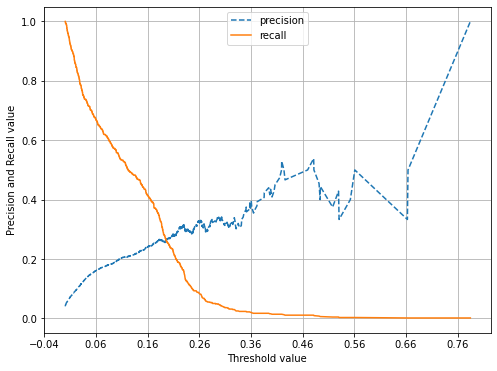

In [42]:
# 임계값 시각화

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_bayes_best.predict_proba(X_test)[:, 1] ) ####


In [43]:
# F1_score가 최대인 임계값 찾기

def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.001)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_bayes_best, X_test, y_test)

(0.172, 0.3061)

In [44]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.172
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[13848   722]
 [  389   245]]
정확도: 0.9269, 정밀도: 0.2534, 재현율: 0.3864, F1_score:  0.386435, ROC_AUC_Score:  0.306059


# 샘플링기법 적용하여 계속.